# Assignment 1
## Group 1
## Group Members: Mirco S. Ghadri, Sameer Jathavedan, Tobias Filmberg

https://www.cse.chalmers.se/~richajo/dit866/assignments/a1/assignment1.html

## Task 0

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
  
# Read the CSV file.
data = pd.read_csv("CTG.csv", skiprows=1)

# Select the relevant numerical columns.
#M - this piece of code is not necessary since it includes all the columns
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']

data = data[selected_cols].dropna()

# Shuffle the dataset.
# M - the frac=1.0 makes sure that when we sample from the data set, we pick all of the rows in the data. It becomes equivalent of shuffling the data set.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
# M - the diagnosis code is either a 0, 1, 2 or a 3. We can verify this using unique() or value_counts()
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [2]:
data["NSP"].unique()

array([2., 1., 3.])

We can see that the data has 22 columns

In [3]:
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,2.722484,7.241298,3.659925,1.570085,0.003293,0.126058,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,3.560850,37.125309,2.847094,2.499229,0.057300,0.464361,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,4.000000,2.000000,5.000000,3.000000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,26.000000,564.000000,23.000000,16.000000,1.000000,4.000000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [4]:
data.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency', 'NSP'],
      dtype='object')

In [5]:
Xtrain.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
1690,137.0,13.0,0.0,3.0,4.0,0.0,0.0,56.0,2.1,0.0,...,136.0,52.0,188.0,3.0,0.0,160.0,144.0,161.0,39.0,1.0
12,131.0,4.0,57.0,6.0,2.0,0.0,0.0,28.0,1.4,0.0,...,66.0,88.0,154.0,5.0,0.0,135.0,134.0,137.0,7.0,1.0
950,142.0,4.0,0.0,6.0,0.0,0.0,0.0,34.0,1.1,0.0,...,67.0,94.0,161.0,5.0,1.0,151.0,146.0,149.0,8.0,1.0
480,140.0,0.0,0.0,1.0,0.0,0.0,0.0,60.0,0.8,32.0,...,120.0,79.0,199.0,9.0,0.0,141.0,141.0,142.0,3.0,0.0
25,124.0,0.0,0.0,0.0,0.0,0.0,0.0,86.0,0.3,72.0,...,12.0,118.0,130.0,1.0,0.0,124.0,124.0,125.0,0.0,0.0


## Task 1 - Classification

In [75]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent')

In [76]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(clf, Xtrain, Ytrain)
score

array([0.78235294, 0.78235294, 0.77941176, 0.77941176, 0.77941176])

In [77]:
aggregated_score = score.mean()
aggregated_score

0.7805882352941176

In [78]:
from sklearn.tree import DecisionTreeClassifier

#using default hyper parameters
dtc = DecisionTreeClassifier()
score = cross_val_score(dtc, Xtrain, Ytrain)
score

array([0.89705882, 0.92941176, 0.91176471, 0.90882353, 0.92941176])

In [79]:
score.mean()

0.9152941176470588

In [80]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
score = cross_val_score(rfc, Xtrain, Ytrain)
score

array([0.94117647, 0.95588235, 0.93235294, 0.92352941, 0.94705882])

In [81]:
score.mean()

0.9400000000000001

In [82]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

gbc = GradientBoostingClassifier()
score = cross_val_score(gbc, Xtrain, Ytrain)
score

array([0.94411765, 0.96176471, 0.94411765, 0.94411765, 0.95294118])

In [83]:
score.mean()

0.9494117647058824

In [84]:
from sklearn.linear_model import Perceptron, LogisticRegression

#The logistic regression fails to converge, same with the linearSVC. That is why we do not use these 2 classifiers.
pc = Perceptron()
score = cross_val_score(pc, Xtrain, Ytrain)
score

array([0.84705882, 0.88529412, 0.82941176, 0.85294118, 0.71176471])

In [85]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier()
score = cross_val_score(mlpc, Xtrain, Ytrain)
score


array([0.87941176, 0.90294118, 0.87647059, 0.87058824, 0.86176471])

### From all of the classifiers we tried, the gradient boosting classifier had the highest accuracy: 0.93. The gradient boosting classifier is an ensembling model that works by using a base model and then improving that base model by adding complementary models until its accuracy converges/changes very slowly.


In [86]:
from sklearn.metrics import accuracy_score
  
gbc.fit(Xtrain, Ytrain)
Yguess = gbc.predict(Xtest)
print(accuracy_score(Ytest, Yguess))

0.9295774647887324


## Task 2 - TreeClassifier

In [87]:
import numpy as np

class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        graph.node(node_id, val_str, style='filled')
        return node_counter+1, node_id
        
    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False

In [88]:
class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then 
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id
        

In [89]:
from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod

class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth
        
    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        Y = np.array(Y)        
        self.root = self.make_tree(X, Y, self.max_depth)
        
    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph
    
    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)        

    # This is the recursive training 
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be the most common value in Y.
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        _, best_feature, best_threshold = max(self.best_split(X, Y, feature) for feature in range(n_features))
        
        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
    
    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]
    
    # The following three methods need to be implemented by the classification and regression subclasses.
    
    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass

In [90]:
from collections import Counter

class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point

In [91]:
def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high
    
def entropy(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

def info_gain_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*entropy(low_distr)+n_high*entropy(high_distr))/(n_low+n_high)

def gini_impurity(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return 1-sum(p**2 for p in ps)
    
def gini_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*gini_impurity(low_distr)+n_high*gini_impurity(high_distr))/(n_low+n_high)

In [92]:
#for i in range (20):
    #tc = TreeClassifier(max_depth=i)
    #score = cross_val_score(tc, Xtrain, Ytrain)
    #print(score.mean(), i)

### We used a max depth of 5 since it provided the highest accuracy relative to its low depth value. The accuracy we got was 0.89. The tree that was created could be illustrated using the draw_tree() method.

In [93]:
tc = TreeClassifier(max_depth=5)
tc.fit(Xtrain, Ytrain)
tc.score(Xtest,Ytest)

0.8896713615023474

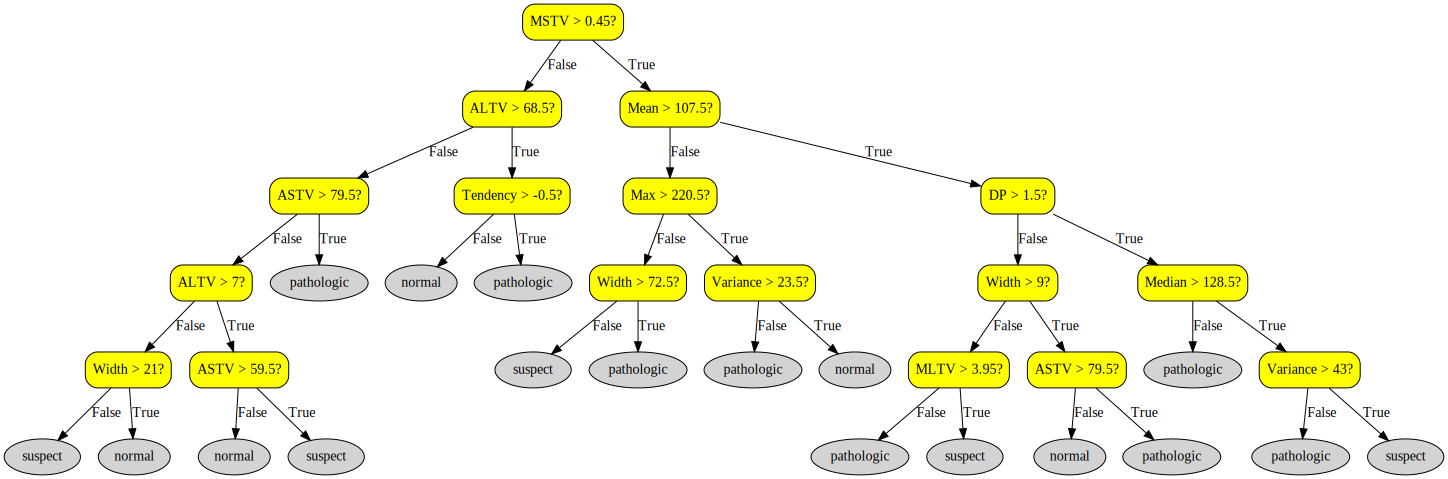

In [94]:
tc.draw_tree()

## Task 3 - Regression: Predicting Apartment Prices

In [95]:
# Read the CSV file using Pandas.
alldata = pd.read_csv("sberbank.csv")

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [96]:
Y

25252    15.632106
9943     15.747032
18040    16.077274
8625     16.147654
13495    15.424948
           ...    
20816    15.173570
25722    14.914123
21502    17.216708
22695    15.937772
12925    15.590463
Name: price_doc, Length: 16758, dtype: float64

In [97]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate

m1 = DummyRegressor()
cross_validate(m1, Xtrain, Ytrain, scoring='neg_mean_squared_error')

{'fit_time': array([0.00102401, 0.00099635, 0.00102329, 0.00099564, 0.00099778]),
 'score_time': array([0.        , 0.00099707, 0.        , 0.        , 0.        ]),
 'test_score': array([-0.39897319, -0.37113485, -0.38083108, -0.39057156, -0.40475168])}

### We will now use a more suitable regressor model that can better predict the price of the apartments(Y) given the features(X). Since we are evaluating based on the negative mean squared error(NMSE), we want this value to be as close to 0 as possible.

In [98]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
cross_validate(lr, Xtrain, Ytrain, scoring='neg_mean_squared_error')

{'fit_time': array([0.0050118 , 0.00401402, 0.00396204, 0.00296283, 0.00296569]),
 'score_time': array([0.00197124, 0.00099874, 0.00102329, 0.00102353, 0.00102234]),
 'test_score': array([-0.30222063, -0.32537384, -0.29377903, -0.29296258, -0.29265721])}

In [99]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
cross_validate(dtr, Xtrain, Ytrain, scoring='neg_mean_squared_error')

{'fit_time': array([0.04188204, 0.04089141, 0.03889608, 0.04088664, 0.03986025]),
 'score_time': array([0.00299668, 0.00199485, 0.00199413, 0.00199556, 0.00202751]),
 'test_score': array([-0.53702463, -0.53030658, -0.51782233, -0.49800874, -0.55875108])}

In [100]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
cross_validate(rfr, Xtrain, Ytrain, scoring='neg_mean_squared_error')

{'fit_time': array([2.43947792, 2.44047594, 2.44243479, 2.4843874 , 2.46637154]),
 'score_time': array([0.06087303, 0.06083488, 0.06083751, 0.06083918, 0.06183505]),
 'test_score': array([-0.29735547, -0.27636616, -0.27743108, -0.28434543, -0.28596269])}

In [101]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
cross_validate(gbr, Xtrain, Ytrain, scoring='neg_mean_squared_error')

{'fit_time': array([0.58443809, 0.57645702, 0.58048129, 0.57546139, 0.57542825]),
 'score_time': array([0.00498796, 0.004987  , 0.00398898, 0.00498676, 0.00498652]),
 'test_score': array([-0.27632776, -0.24920729, -0.26293749, -0.27079364, -0.26333751])}

### We used the gradient boosting regressor since it had the highest accuracy score(lowest mean squared error). The mean squared error for the gradient boosting regressor was 0.27.

In [102]:
from sklearn.metrics import mean_squared_error
  
gbr.fit(Xtrain, Ytrain)
mean_squared_error(Ytest, gbr.predict(Xtest))

0.2714254889474591

### From looking at the results, it seems odd that the DummyRegressor had a smaller mean squared error than the Decision Tree Regressor. This means that the dummy regressor was better at predicting apartment prices than the Decision Tree Regressor which is hard to digest.

## Task 4 - Decision Trees For Regression: TreeRegressor()

### Step 1) Implementing the regression model

In [103]:
from sklearn.base import RegressorMixin

class TreeRegressor(DecisionTree, RegressorMixin):
    
    def __init__(self, max_depth=10, threshold = 0.01):
        super().__init__(max_depth)
        self.threshold = threshold
    
    def get_default_value(self, Y):
        return np.mean(Y)

    def is_homogeneous(self, Y):
        return np.var(Y)<self.threshold
    
    #helper function for find_best_spl
    def variance_reduction_scorer(self, var_total, n_low, low_var, n_high, high_var):
        n_total = n_low+n_high
        variance_reduction_score = var_total - (n_high*high_var + n_low*low_var)/n_total
        #higher variance reduction score is preferred. This indicates that the variance of the subsets are smaller than the total variance
        return variance_reduction_score

    def best_split(self, X, Y, feature):
        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None
        
        # We need to keep track of the total variance because the variance reduction formula needs to know the total variance
        total_var = np.var(Y)
        
        sum_y_low = 0
        sum_y_squared_low = 0
        sum_y_high = np.sum(Y)
        sum_y_squared_high = np.sum(np.square(Y))
        
        # Go through all the positions (excluding the last position). This is because we need to have 2 subsets, which we cant have if one of the splits is empty
        for i in range(0, n-1):

            # Input and output at the current position.
            
            #value of the feature at position i
            x_i = X_sorted[i]
            #value of the output at position i - we are interested in the variance of the output only
            y_i = Y_sorted[i]
            
            # Update the variances for the low and high splits
            #time consuming method
            #low_var = np.var(Y[:i+1])
            #high_var = np.var(Y[i+1:])
            
            #efficient method
            n_low = len(Y[:i+1])
            n_high = len(Y[i+1:])
            sum_y_low += y_i
            sum_y_squared_low += (y_i**2)
            sum_y_high -= y_i
            sum_y_squared_high -= (y_i**2)
            
            low_var = sum_y_squared_low/n_low - (sum_y_low**2)/(n_low**2)
            
            high_var = sum_y_squared_high/n_high - (sum_y_high**2)/(n_high**2)
            
            
            # If the input is equal to the input at the next position, we will
            # not consider a split here. This is because the 2 features have the same value, and we want either above or below the features
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.variance_reduction_scorer(total_var, i+1, low_var, n-i-1, high_var)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point
    

### Step 2) Sanity check

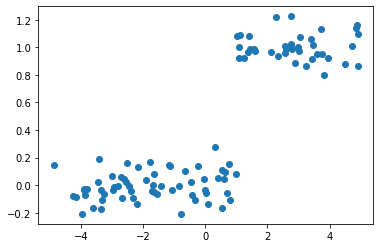

In [116]:
from matplotlib import pyplot as plt

def make_some_data(n):
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1*np.random.normal(size=n)
    X = x.reshape(n, 1) # X needs to be a 2-dimensional matrix
    return X, Y

X, Y = make_some_data(100)
plt.scatter(X,Y)

### If you consider the data-generating function, what kind of decision tree would we want to describe this data?

### We can see that the data forms 2 clear clusters, one cluster in the bottom left area and one cluster in the top right area. If we think of the X and Y values as both of them being features and the clusters representing some form of classification, such as dog and cat, then a decision tree classifier would be the appropriate model to use. However, in the data-generating function, it assumes that X is a feature and Y is an output. In that case, it does not make sense to use a decision tree classifier because the output Y is not discrete, but a continuous value. Thus, a decision tree regressor would be appropriate to use.


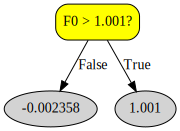

In [117]:
tree_regressor = TreeRegressor(max_depth=1)
tree_regressor.fit(X,Y)
tree_regressor.draw_tree()

### We made the tree depth equal to 1 because we think that the Y value forms 2 clusters for when x is smaller/larger than the value 1. The tree that was created matched our expectations. It uses the value ≈1 to divide the output into 2 categories, where both categories reflect the mean of their respective cluster. This is how we created the TreeRegressor class and how the variance reduction algorithm is supposed to work.


### What happens if we allow the tree depth to be a large number?

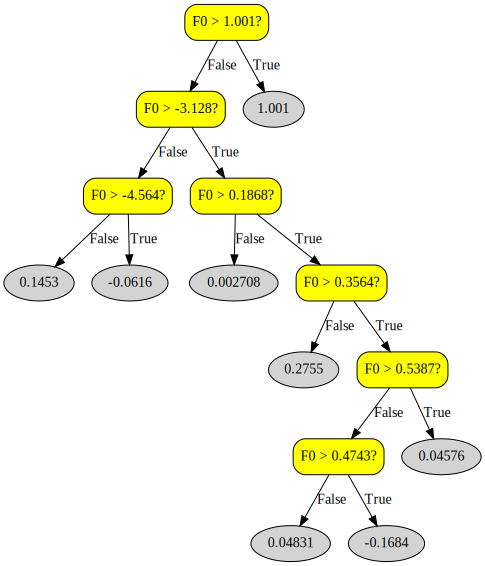

In [118]:
tree_regressor = TreeRegressor(max_depth=10)
tree_regressor.fit(X,Y)
tree_regressor.draw_tree()

### If we allow the tree depth to be a large number, it works similarily as before on the first split. It splits it into 2 subsets based if x(F0) is greater than or smaller than ≈1. However, after the first split, it performs more splits based on the value of X. The algorithm always splits on a value of X that gives the lowest variance in the resulting 2 subsets.

### Step 3) We will now train and evaluate the TreeRegressor() model that we created on the apartment prices data

In [107]:
Xtrain

,year,full_sq,life_sq,floor,num_room,kitch_sq,full_all
11619,2013,76,45.0,9.0,3.0,10.0,76284
11300,2013,56,30.0,8.0,2.0,12.0,91100
20241,2014,38,22.0,3.0,2.0,6.0,57405
21320,2014,48,32.0,5.0,2.0,8.0,85083
27572,2015,62,62.0,2.0,1.0,1.0,39873
...,...,...,...,...,...,...,...
30410,2015,42,28.0,2.0,2.0,5.0,79576
10361,2013,69,47.0,3.0,3.0,8.0,142243
10373,2013,37,23.0,6.0,2.0,5.0,76284
27781,2015,44,29.0,1.0,2.0,6.0,7538


### We chose to create a tree with max_depth=5 because there are 7 features and 5 is close enough(the depth does not need to be exactly the same as the number of features). We then retrained the tree_regressor on the Xtrain and Ytrain data of the apartment prices.

In [108]:
tree_regressor = TreeRegressor(max_depth=5)
tree_regressor.fit(Xtrain, Ytrain)

In [109]:
cross_validate(tree_regressor, Xtrain, Ytrain, scoring='neg_mean_squared_error')

{'fit_time': array([1.15391541, 1.18685746, 1.15786886, 1.15693998, 1.16688108]),
 'score_time': array([0.00498652, 0.0039928 , 0.00398946, 0.00398874, 0.00398731]),
 'test_score': array([-0.29253768, -0.26968665, -0.28251061, -0.2861723 , -0.28246262])}

### We got a mean squared accuracy of 0.29 after we trained the TreeRegressor() model on the training data and tested it on the test set.


In [110]:
mean_squared_error(Ytest, tree_regressor.predict(Xtest))

0.2908115453881927

### Step 4) Underfitting and Overfitting

In [111]:
train_evaluation_score = []
test_evaluation_score = []
for i in range(13):
    tree_regressor = TreeRegressor(max_depth=i)
    tree_regressor.fit(Xtrain,Ytrain)
    train_evaluation_score.append(mean_squared_error(Ytrain, tree_regressor.predict(Xtrain)))
    test_evaluation_score.append(mean_squared_error(Ytest, tree_regressor.predict(Xtest)))

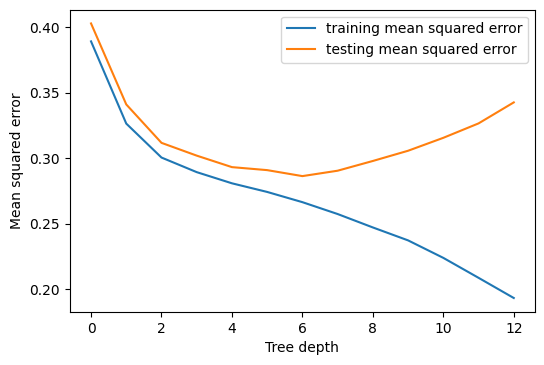

In [112]:
plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(13),train_evaluation_score, label="training mean squared error")
plt.plot(range(13),test_evaluation_score, label="testing mean squared error")
plt.xlabel("Tree depth")
plt.ylabel("Mean squared error")
plt.legend()
plt.show()

### We can see that as the tree depth increases and goes beyond 5, the gap between the test accuracy and training accuracy increases. For tree depth of 12, the mean squared error on the training set lies around 0.2 while it lies around 0.35 for the test set. This could suggest the model is overfitting. Overfitting is when the decision tree adapts itself well to describe the patterns in the training data but poorly generalizes to other unknown data, in this case the test set which it has not been trained on. A decision tree with a larger depth has a higher tendency of overfitting because it can specialize itself more to the training data. We see that a tree depth of 5 or 6 seems to be optimal depth since it provides the best accuracy without risking the model to be overfitted.